In [1]:
import torch
print(torch.__version__)

2.5.0+cu121


In [2]:
!python --version

Python 3.10.12


In [3]:
# If in Colab, then import the drive module from google.colab
if 'google.colab' in str(get_ipython()):
  from google.colab import drive
  # Mount the Google Drive to access files stored there
  drive.mount('/content/drive/')

  # Install the latest version of torchtext library quietly without showing output

  !pip install transformers evaluate wandb datasets accelerate  -U -qq  ## NEW LINES ##

  basepath = '/content/drive/MyDrive/NLP_Emotions'


Mounted at /content/drive/
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 44.1/44.1 kB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 10.0/10.0 MB 76.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 84.0/84.0 kB 7.5 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 472.7/472.7 kB 36.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 330.9/330.9 kB 30.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 116.3/116.3 kB 12.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚

In [4]:
# standard data science librraies for data handling and v isualization
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix, precision_score, recall_score, f1_score
import joblib


# New libraries introduced in this notebook
import evaluate
from datasets import load_dataset, DatasetDict, Dataset, ClassLabel
from transformers import TrainingArguments, Trainer, set_seed
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from transformers import AutoConfig
from transformers import pipeline
import wandb
from google.colab import userdata
from huggingface_hub import login
import torch.nn as nn
import ast

In [5]:
base_folder = Path(basepath)
data_folder = base_folder/'datasets'
model_folder = base_folder/'models'
custom_functions = base_folder/'custom-functions'

In [6]:
wandb_api_key = userdata.get('WANDB_API_KEY')
hf_token = userdata.get('HF_TOKEN')


In [7]:
if hf_token:
    # Log in to Hugging Face
    login(token=hf_token)
    print("Successfully logged in to Hugging Face!")
else:
    print("Hugging Face token not found in notebook secrets.")


The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: read).
Your token has been saved to /root/.cache/huggingface/token
Login successful
Successfully logged in to Hugging Face!


In [8]:
if wandb_api_key:
  wandb.login(key=wandb_api_key)
  print("Successfully logged in to WANDB!")
else:
    print("WANDB key not found in notebook secrets.")


wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Successfully logged in to WANDB!


In [9]:
train_data=pd.read_csv(data_folder/'train.csv')


In [10]:
train_data.head()

ID                                              Tweet  anger  \
0  2017-21441  ‚ÄúWorry is a down payment on a problem you may ...      0   
1  2017-31535  Whatever you decide to do make sure it makes y...      0   
2  2017-21068  @Max_Kellerman  it also helps that the majorit...      1   
3  2017-31436  Accept the challenges so that you can literall...      0   
4  2017-22195  My roommate: it's okay that we can't spell bec...      1   

   anticipation  disgust  fear  joy  love  optimism  pessimism  sadness  \
0             1        0     0    0     0         1          0        0   
1             0        0     0    1     1         1          0        0   
2             0        1     0    1     0         1          0        0   
3             0        0     0    1     0         1          0        0   
4             0        1     0    0     0         0          0        0   

   surprise  trust  
0         0      1  
1         0      0  
2         0      0  
3         0      0  
4         0      0

In [11]:
import re
def clean_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove special characters and punctuation
    text = re.sub(r'\W', ' ', text)
    # Remove single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text


In [12]:
train_data['Tweet'] = train_data['Tweet'].apply(clean_text)

# <font color = 'indianred'> **3. Accessing and Manuplating Splits**</font>



<font color = 'indianred'>*Create futher subdivions of the splits*</font>

In [13]:
# First split: 60% training and 40% (test + validation)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

# Check the shapes of the new datasets
train_data.shape, val_data.shape

((6179, 13), (1545, 13))

In [14]:
X_train=train_data['Tweet']
X_val=val_data['Tweet']

In [15]:
y_train = train_data[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love',
                    'optimism', 'pessimism', 'sadness', 'surprise', 'trust']].values.tolist()

y_valid = val_data[['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love',
                    'optimism', 'pessimism', 'sadness', 'surprise', 'trust']].values.tolist()

In [16]:
trainset = Dataset.from_dict({
    'texts': X_train,
    'labels': y_train
})

In [17]:
validset = Dataset.from_dict({
    'texts': X_val,
    'labels': y_valid
})

In [18]:
train_val_subset= DatasetDict(
    {"train": trainset, "valid": validset})

In [19]:
train_val_subset

DatasetDict({
    train: Dataset({
        features: ['texts', 'labels'],
        num_rows: 6179
    })
    valid: Dataset({
        features: ['texts', 'labels'],
        num_rows: 1545
    })
})

In [20]:
train_val_subset['train']['labels'][0]

[0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [21]:
train_val_subset['train']['texts'][0]

'Going to get myself copy of StephenKing CUJO for an upcoming project that can talk about just yet amwriting'

# <font color = 'indianred'>**4. Load pre-trained Tokenizer**</font>



In [22]:
checkpoint = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

#<font color = 'indianred'> **5. Create function for Tokenizer**



In [23]:
def tokenize_fn(batch):
    return tokenizer(text = batch["texts"], truncation=True)

<font color = 'indianred'> *Use map function to apply tokenization to all splits*

In [24]:
tokenized_dataset= train_val_subset.map(tokenize_fn, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(
    ['texts']
)
tokenized_dataset.set_format(type='torch')

Map:   0%|          | 0/6179 [00:00<?, ? examples/s]

Map:   0%|          | 0/1545 [00:00<?, ? examples/s]

In [25]:
tokenized_dataset

DatasetDict({
    train: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 6179
    })
    valid: Dataset({
        features: ['labels', 'input_ids', 'attention_mask'],
        num_rows: 1545
    })
})

In [26]:
tokenized_dataset['train']['labels'][0]

tensor([0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0])

In [27]:
tokenized_dataset = (tokenized_dataset
          .map(lambda x : {"float_label": x["labels"].to(torch.float)}, remove_columns=["labels"])
          .rename_column("float_label", "label"))

Map:   0%|          | 0/6179 [00:00<?, ? examples/s]

Map:   0%|          | 0/1545 [00:00<?, ? examples/s]

In [28]:
tokenized_dataset['train']['label'][0:3]

tensor([[0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.],
        [1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0.]])

In [29]:
print(len(tokenized_dataset["train"]["input_ids"][2]))

27


In [30]:
print(len(tokenized_dataset["train"]["input_ids"][1]))

31


#  <font color = 'indianred'> **6. Model Training**

##  <font color = 'indianred'> **6.1 Download pre-trained model**

In [31]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels = 11, problem_type="multi_label_classification")  # We are using the same checkpiont as we have used for tokenizer


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


##  <font color = 'indianred'> **6.2 Downaload and Modify Model Config File**

In [32]:
class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love',
                    'optimism', 'pessimism', 'sadness', 'surprise', 'trust']
print(class_names)
config = AutoConfig.from_pretrained(checkpoint)
id2label= {id_: label_ for id_, label_ in enumerate(class_names)}
label2id = {label_: id_ for id_, label_ in enumerate(class_names)}
config.id2label = id2label
config.label2id = label2id
model.config = config


['anger', 'anticipation', 'disgust', 'fear', 'joy', 'love', 'optimism', 'pessimism', 'sadness', 'surprise', 'trust']


##  <font color = 'indianred'> **6.3 compute_metrics function** </font>



In [33]:
# load training metrices
accuracy = evaluate.load('accuracy', 'multilabel')
f1 = evaluate.load('f1','multilabel')
accuracy_flatten = evaluate.load('accuracy')

def compute_metrics(eval_pred):
    # accuracy_metric = evaluate.load('accuracy', 'multilabel')

    logits, labels = eval_pred
    preds = (logits > 0).astype(int)
    accuracy_label = accuracy_flatten.compute(predictions=preds.flatten(), references=labels.flatten())
    accuracy_all = accuracy.compute(predictions=preds, references=labels)
    f1_micro = f1.compute(predictions=preds, references=labels, average='micro')
    f1_macro = f1.compute(predictions=preds, references=labels, average='macro')
    return {'f1_micro':f1_micro['f1'],
            'f1_macro':f1_macro['f1'],
            'accuracy_label':accuracy_label['accuracy'],
             'accuracy_all':accuracy_all['accuracy']}


## <font color = 'indianred'> **6.4 Training Arguments**</font>







In [34]:
# Define the directory where model checkpoints will be saved
model_folder = base_folder/'models'/'stack/bert'
# Create the directory if it doesn't exist
model_folder.mkdir(exist_ok=True, parents=True)
run_name= 'roberta_base_exp1'

# Configure training parameters
training_args = TrainingArguments(
    seed = 42,
    # Training-specific configurations
    num_train_epochs=1,  # Total number of training epochs
    # Number of samples per training batch for each device
    per_device_train_batch_size=16,
    # Number of samples per evaluation batch for each device
    per_device_eval_batch_size=16,
    weight_decay=0.01,  # Apply L2 regularization to prevent overfitting
    learning_rate=2e-5,  # Step size for the optimizer during training
    optim='adamw_torch',  # Optimizer,

    # Checkpoint saving and model evaluation settings
    output_dir=str(model_folder),  # Directory to save model checkpoints
    eval_strategy='steps',  # Evaluate model at specified step intervals
    eval_steps=20,  # Perform evaluation every 10 training steps
    save_strategy="steps",  # Save model checkpoint at specified step intervals
    save_steps=20,  # Save a model checkpoint every 10 training steps
    load_best_model_at_end=True,  # Reload the best model at the end of training
    save_total_limit=2,  # Retain only the best and the most recent model checkpoints
    # Use 'accuracy' as the metric to determine the best model
    metric_for_best_model="eval_f1_macro",
    greater_is_better=True,  # A model is 'better' if its accuracy is higher


    # Experiment logging configurations (commented out in this example)
    logging_strategy='steps',
    logging_steps=20,
    report_to='wandb',  # Log metrics and results to Weights & Biases platform
    run_name= run_name,  # Experiment name for Weights & Biases
)


##  <font color = 'indianred'> **6.5 Initialize Trainer**</font>



In [35]:
def calculate_pos_weights(dataset):
    # Initialize counters for all labels
    num_labels = len(dataset['train']['label'][0])
    total_positives = [0] * num_labels
    total_negatives = [0] * num_labels

    # Count positives and negatives for each label
    for label_array in dataset['train']['label']:
        for i, label in enumerate(label_array):
            if label == 1:
                total_positives[i] += 1
            else:
                total_negatives[i] += 1

    # Calculate pos_weight for each label
    pos_weight = [total_negatives[i] / max(total_positives[i], 1) for i in range(num_labels)]
    return torch.tensor(pos_weight)

In [36]:
pos_weights = calculate_pos_weights(tokenized_dataset)

In [37]:
pos_weights

tensor([ 1.7018,  6.0216,  1.6576,  4.8403,  1.6657,  8.0734,  2.3256,  7.7274,
         2.4082, 17.9540, 19.0617])

In [38]:
# initialize trainer
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels").float()  # Ensure labels are float for BCE loss
        outputs = model(**inputs)
        logits = outputs.get("logits")

        device = next(model.parameters()).device

        loss_fct = nn.BCEWithLogitsLoss(pos_weight=pos_weights.to(device))
        loss = loss_fct(logits, labels)

        return (loss, outputs) if return_outputs else loss


In [39]:
# initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["valid"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer,
)


<ipython-input-39-0ae4737cf1d4>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


## <font color = 'indianred'> **6.6 Setup WandB**</font>

In [40]:
%env WANDB_PROJECT = roberta_base_emotions_exp1

env: WANDB_PROJECT=roberta_base_emotions_exp1


##  <font color = 'indianred'> **6.7 Training and Validation**

In [41]:
trainer.train()

wandb: Currently logged in as: budalapraneeth (budalapraneeth-university-of-texas-at-dallas). Use `wandb login --relogin` to force relogin


TrainOutput(global_step=387, training_loss=0.4046742780572068, metrics={'train_runtime': 190.3477, 'train_samples_per_second': 32.462, 'train_steps_per_second': 2.033, 'total_flos': 107686386667710.0, 'train_loss': 0.4046742780572068, 'epoch': 1.0})

In [42]:
eval_results = trainer.evaluate(tokenized_dataset["valid"])

In [43]:
eval_results

{'eval_loss': 0.3559471666812897,
 'eval_f1_micro': 0.5969362543238346,
 'eval_f1_macro': 0.35869358403483764,
 'eval_accuracy_label': 0.8560164754339512,
 'eval_accuracy_all': 0.2,
 'eval_runtime': 1.6825,
 'eval_samples_per_second': 918.265,
 'eval_steps_per_second': 57.652,
 'epoch': 1.0}

In [44]:
wandb.log({"eval_f1_macro": eval_results["eval_f1_macro"], "eval_loss": eval_results["eval_loss"], "eval_accuracy": eval_results["eval_accuracy_all"]})

In [45]:
from scipy.special import expit as sigmoid
valid_output = trainer.predict(tokenized_dataset["valid"])

# Get probabilities from logits
valid_logits = valid_output.predictions
valid_probs = sigmoid(valid_logits)
valid_labels = np.array(valid_output.label_ids.astype(int))

In [46]:
def find_best_thresholds_multilabel(probabilities, labels):

    n_labels = labels.shape[1]
    best_thresholds = []
    metrics = {}

    for label_idx in range(n_labels):
        # Get scores and labels for this label
        label_scores = probabilities[:, label_idx]
        label_true = labels[:, label_idx]

        # Sort by scores
        rows = list(zip(label_scores, label_true))
        rows = sorted(rows, key=lambda x: x[0], reverse=True)

        # Initialize metrics
        best_f1 = best_precision = best_recall = 0
        threshold = 0

        # Count total positives for this label
        total_positives = sum(label_true)

        # Initialize counters
        total_predicted_positives = 0
        true_positives = 0

        # print(f"\nAnalyzing label {label_idx}")

        # Try different thresholds
        for i in range(len(rows) - 1):
            score, label = rows[i]
            total_predicted_positives += 1
            if label == 1:
                true_positives += 1

            if true_positives > 0:
                precision = true_positives / total_predicted_positives
                recall = true_positives / total_positives
                f1 = 2 * precision * recall / (precision + recall)

                # Update best metrics if current F1 is better
                if f1 > best_f1:
                    best_f1 = f1
                    best_precision = precision
                    best_recall = recall
                    threshold = (rows[i][0] + rows[i + 1][0]) / 2

                    # print(f"New best threshold found: {threshold:.3f}")
                    # print(f"F1: {best_f1:.3f}, Precision: {best_precision:.3f}, Recall: {best_recall:.3f}")

        best_thresholds.append(threshold)
        metrics[label_idx] = {
            'f1': best_f1,
            'precision': best_precision,
            'recall': best_recall,
            'threshold': threshold
        }


    return best_thresholds, metrics



In [47]:
optimal_thresholds, metrics = find_best_thresholds_multilabel(valid_probs, valid_labels)


In [48]:
optimal_thresholds

[0.4088900089263916,
 0.17994245886802673,
 0.3677235245704651,
 0.28157228231430054,
 0.5105208158493042,
 0.3792136311531067,
 0.34417518973350525,
 0.18549367785453796,
 0.3752443790435791,
 0.07243303209543228,
 0.08374528586864471]

In [49]:
accuracy = evaluate.load('accuracy', 'multilabel')
f1 = evaluate.load('f1','multilabel')
accuracy_flatten = evaluate.load('accuracy')
def compute_metrics(eval_pred, thresholds):
    # accuracy_metric = evaluate.load('accuracy', 'multilabel')

    logits, labels = eval_pred
    probs = sigmoid(logits)
    preds = (probs > thresholds).astype(int)
    accuracy_label = accuracy_flatten.compute(predictions=preds.flatten(), references=labels.flatten())
    accuracy_all = accuracy.compute(predictions=preds, references=labels)
    f1_micro = f1.compute(predictions=preds, references=labels, average='micro')
    f1_macro = f1.compute(predictions=preds, references=labels, average='macro')
    return {'f1_micro':f1_micro['f1'],
            'f1_macro':f1_macro['f1'],
            'accuracy_label':accuracy_label['accuracy'],
             'accuracy_all':accuracy_all['accuracy']}

In [50]:
compute_metrics((valid_logits, valid_labels), optimal_thresholds)

{'f1_micro': 0.5895732462560522,
 'f1_macro': 0.5317599263158088,
 'accuracy_label': 0.7855251544571933,
 'accuracy_all': 0.06666666666666667}

In [51]:
valid_preds = (valid_probs > optimal_thresholds).astype(int)
mcm = multilabel_confusion_matrix(valid_labels, valid_preds)
print(mcm)

[[[ 833  140]
  [ 122  450]]

 [[1058  265]
  [ 112  110]]

 [[ 711  238]
  [ 104  492]]

 [[1055  185]
  [ 130  175]]

 [[ 898   88]
  [ 137  422]]

 [[1312   82]
  [  59   92]]

 [[ 899  213]
  [  98  335]]

 [[1124  234]
  [  70  117]]

 [[ 815  270]
  [ 125  335]]

 [[ 906  569]
  [  37   33]]

 [[1121  332]
  [  35   57]]]


In [52]:
def multilabel_evaluation(y_true, y_pred, class_names=None, figsize=(12, 8)):
    """
    Generate comprehensive evaluation visualizations for multilabel classification results.

    Parameters:
    -----------
    y_true : array-like
        True labels (n_samples, n_classes)
    y_pred : array-like
        Predicted labels (n_samples, n_classes)
    class_names : list, optional
        List of class names for better visualization
    figsize : tuple, optional
        Base figure size for plots (width, height)

    Returns:
    --------
    dict
        Dictionary containing the computed metrics for each class
    """
    # Validate inputs
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    if y_true.shape != y_pred.shape:
        raise ValueError("y_true and y_pred must have the same shape")

    # Generate class names if not provided
    if class_names is None:
        class_names = [f'Class {i}' for i in range(y_true.shape[1])]

    # Calculate confusion matrices
    mcm = multilabel_confusion_matrix(y_true, y_pred)

    # 1. Individual Confusion Matrix Heatmaps
    n_classes = len(class_names)
    n_cols = min(3, n_classes)
    n_rows = (n_classes + n_cols - 1) // n_cols

    plt.figure(figsize=(figsize[0], figsize[1] * n_rows/2))
    for idx, matrix in enumerate(mcm):
        plt.subplot(n_rows, n_cols, idx + 1)
        sns.heatmap(matrix, annot=True, fmt='g', cmap='Blues',
                    xticklabels=['Pred Neg', 'Pred Pos'],
                    yticklabels=['True Neg', 'True Pos'])
        plt.title(f'{class_names[idx]}')
    plt.tight_layout()
    plt.show()

    # 2. Calculate and plot aggregate metrics
    metrics = {
        'Precision': precision_score(y_true, y_pred, average=None),
        'Recall': recall_score(y_true, y_pred, average=None),
        'F1-Score': f1_score(y_true, y_pred, average=None)
    }

    metrics_df = pd.DataFrame(metrics, index=class_names)

    # Metrics Heatmap
    plt.figure(figsize=(figsize[0]/1.5, figsize[1]/1.5))
    sns.heatmap(metrics_df, annot=True, fmt='.3f', cmap='Blues')
    plt.title('Performance Metrics by Class')
    plt.tight_layout()
    plt.show()

    # 3. Metrics Histogram
    plt.figure(figsize=(figsize[0], figsize[1]/1.5))
    metrics_df.plot(kind='bar', width=0.8)
    plt.xlabel('Classes')
    plt.ylabel('Score')
    plt.title('Precision, Recall, and F1-Score by Class')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # 4. Calculate and return summary statistics
    summary_stats = {
        'macro_avg': {
            'precision': np.mean(metrics['Precision']),
            'recall': np.mean(metrics['Recall']),
            'f1': np.mean(metrics['F1-Score'])
        },
        'per_class': metrics_df.to_dict()
    }

    return summary_stats


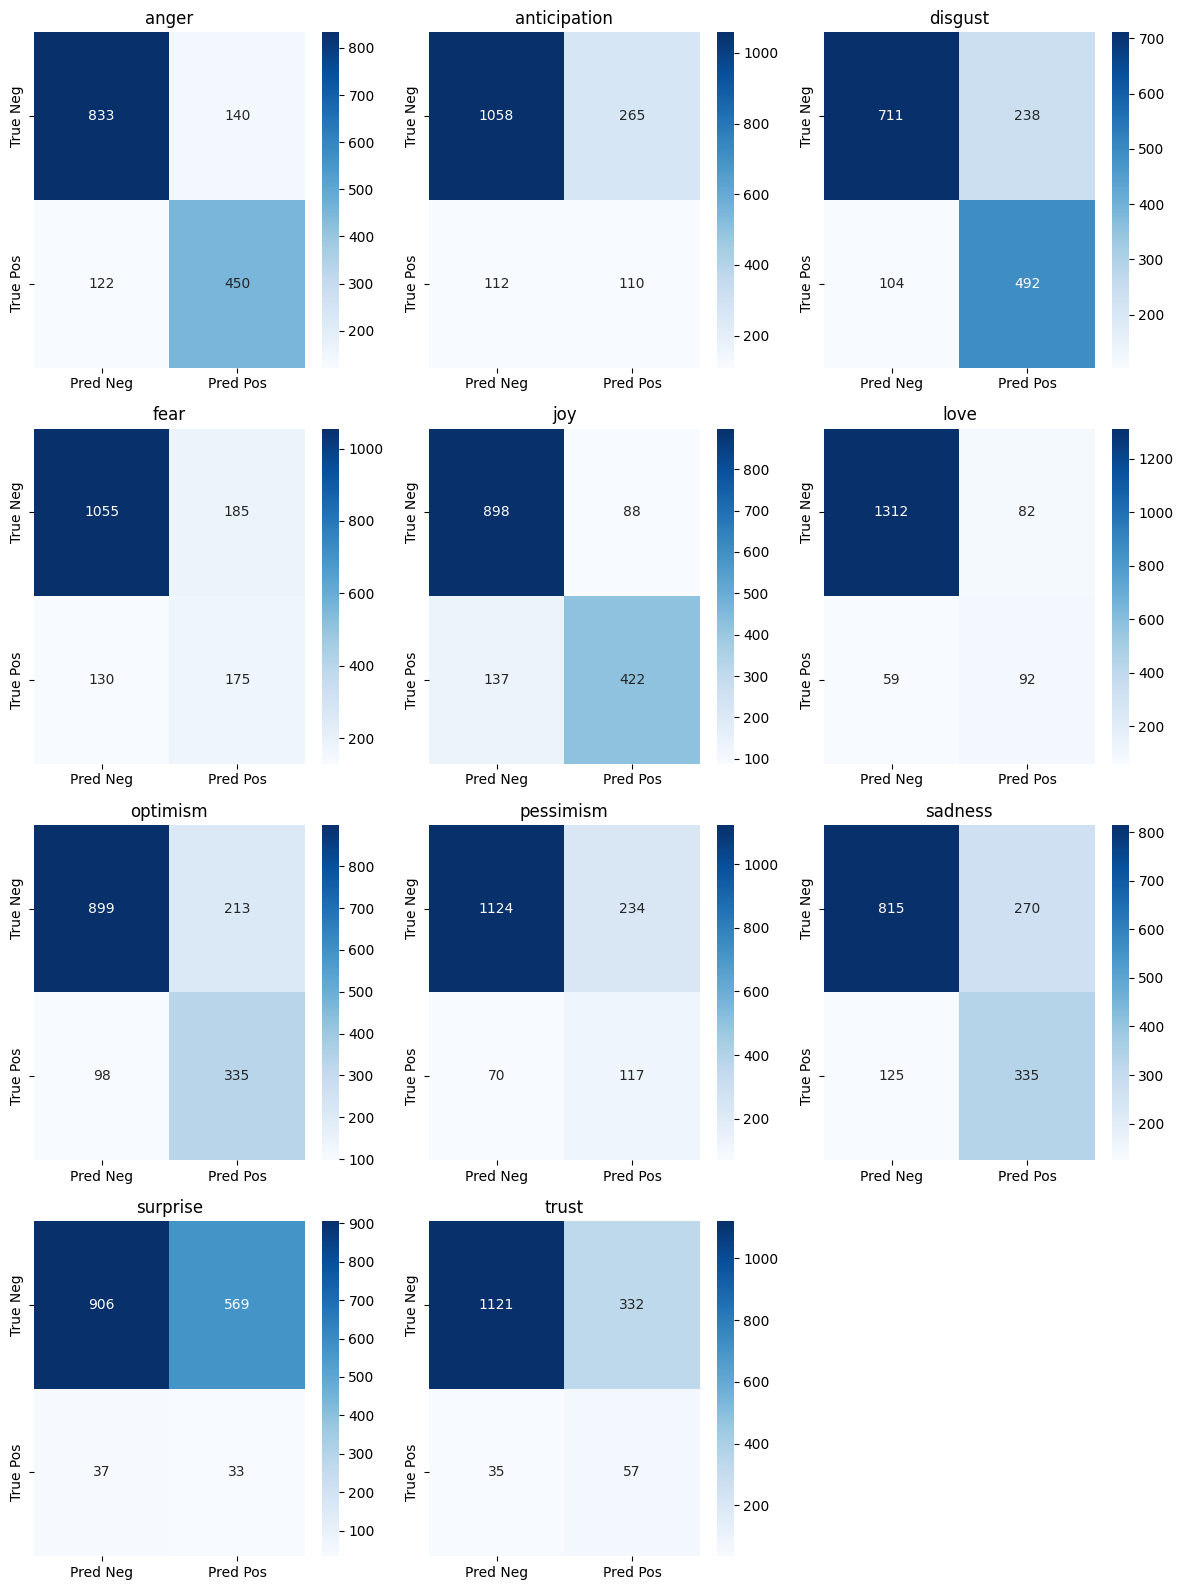

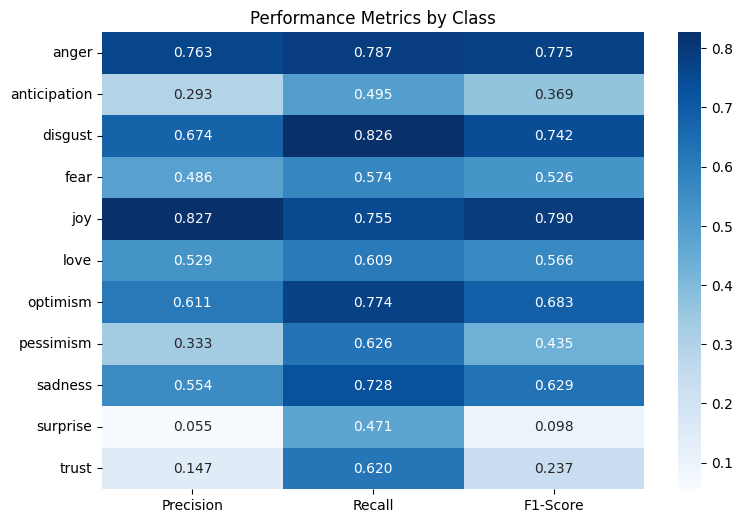

<Figure size 1200x533.333 with 0 Axes>

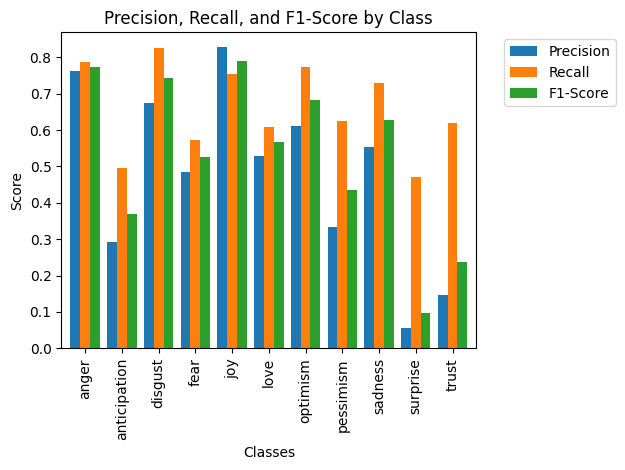

{'macro_avg': {'precision': 0.4792753248279512,
  'recall': 0.660388074091938,
  'f1': 0.5317599263158088},
 'per_class': {'Precision': {'anger': 0.7627118644067796,
   'anticipation': 0.29333333333333333,
   'disgust': 0.673972602739726,
   'fear': 0.4861111111111111,
   'joy': 0.8274509803921568,
   'love': 0.5287356321839081,
   'optimism': 0.6113138686131386,
   'pessimism': 0.3333333333333333,
   'sadness': 0.5537190082644629,
   'surprise': 0.054817275747508304,
   'trust': 0.14652956298200515},
  'Recall': {'anger': 0.7867132867132867,
   'anticipation': 0.4954954954954955,
   'disgust': 0.825503355704698,
   'fear': 0.5737704918032787,
   'joy': 0.7549194991055456,
   'love': 0.609271523178808,
   'optimism': 0.7736720554272517,
   'pessimism': 0.6256684491978609,
   'sadness': 0.7282608695652174,
   'surprise': 0.4714285714285714,
   'trust': 0.6195652173913043},
  'F1-Score': {'anger': 0.774526678141136,
   'anticipation': 0.3685092127303183,
   'disgust': 0.7420814479638009,

In [53]:
multilabel_evaluation(y_true=valid_labels, y_pred=valid_preds, class_names=class_names, figsize=(12, 8))

In [54]:
# After training, let us check the best checkpoint
# We need this for Inference
best_model_checkpoint_step = trainer.state.best_model_checkpoint.split('-')[-1]
print(f"The best model was saved at step {best_model_checkpoint_step}.")


The best model was saved at step 380.


In [55]:
checkpoint = str(model_folder/f'checkpoint-{best_model_checkpoint_step}')
custom_pipeline = pipeline(
    task="text-classification",
    model=checkpoint,
    tokenizer=checkpoint,
    device=0,
    return_all_scores=True,
    function_to_apply='sigmoid')

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


In [56]:
test_data=pd.read_csv(data_folder/'test.csv')

In [57]:
test_data

ID                                              Tweet anger  \
0     2018-01559  @Adnan__786__ @AsYouNotWish Dont worry Indian ...  NONE   
1     2018-03739  Academy of Sciences, eschews the normally sobe...  NONE   
2     2018-00385                  I blew that opportunity -__- #mad  NONE   
3     2018-03001             This time in 2 weeks I will be 30... üò•  NONE   
4     2018-01988  #Deppression is real. Partners w/ #depressed p...  NONE   
...          ...                                                ...   ...   
3254  2018-03848  shaft abrasions from panties merely shifted to...  NONE   
3255  2018-00416  @lomadia heard of Remothered? Indie horror gam...  NONE   
3256  2018-03717        All this fake outrage. Y'all need to stop ü§£  NONE   
3257  2018-03504  Would be ever so grateful if you could record ...  NONE   
3258  2018-00115  I'm the wholesome drunk that sends people meme...  NONE   

     anticipation disgust  fear   joy  love optimism pessimism sadness  \
0            NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
1            NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
2            NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
3            NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
4            NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
...           ...     ...   ...   ...   ...      ...       ...     ...   
3254         NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
3255         NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
3256         NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
3257         NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   
3258         NONE    NONE  NONE  NONE  NONE     NONE      NONE    NONE   

     surprise trust  
0        NONE  NONE  
1        NONE  NONE  
2        NONE  NONE  
3        NONE  NONE  
4        NONE  NONE  
...       ...   ...  
3254     NONE  NONE  
3255     NONE  NONE  
3256     NONE  NONE  
3257     NONE  NONE  
3258     NONE  NONE  

[3259 rows x 13 columns]

In [58]:
y = test_data.drop(columns=['ID', 'Tweet']).replace('NONE', 0)
y_test = y.values.tolist()  # Convert to list of lists


testset = Dataset.from_dict({
    'text': test_data['Tweet'].tolist(),  # Convert Series to list
    'labels': y_test  # Multilabels for test set
})



<ipython-input-58-14b42cb074d1>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y = test_data.drop(columns=['ID', 'Tweet']).replace('NONE', 0)


In [59]:
preds = custom_pipeline(testset['text'], truncation=True)

In [60]:
import pandas as pd

def get_positive_labels(pipeline_output, thresholds, class_names):
    """
    Extracts positive labels from pipeline output and ensures consistent columns
    using specific thresholds for each class.

    Args:
        pipeline_output: The output from the Hugging Face pipeline.
        thresholds: A list of thresholds for each class, ordered as per class_names.
        class_names: A list of all possible class names.

    Returns:
        A list of dictionaries, where each dictionary represents a sample
        and contains the positive labels and their scores.
    """
    positive_labels = []

    # Convert thresholds to dictionary if passed as a list
    if isinstance(thresholds, list):
        thresholds = dict(zip(class_names, thresholds))

    for pred_set in pipeline_output:
        sample_positives = {}
        # Initialize all class scores to 0
        for class_name in class_names:
            sample_positives[class_name] = 0
        # Update scores for positive predictions based on specific thresholds
        for pred in pred_set:
            threshold = thresholds.get(pred['label'], 0.5)  # Default to 0.5 if not specified
            if pred['score'] >= threshold:
                sample_positives[pred['label']] = 1
        positive_labels.append(sample_positives)

    return positive_labels

# Example usage with 'preds' and 'class_names' defined, along with 'optimal_thresholds'


In [61]:
results = get_positive_labels(preds, thresholds=optimal_thresholds, class_names=class_names)
predicted_labels = pd.DataFrame(results)


In [62]:
predicted_labels

anger  anticipation  disgust  fear  joy  love  optimism  pessimism  \
0         1             0        1     0    0     0         0          0   
1         1             0        1     0    0     0         0          0   
2         1             0        1     0    0     0         0          0   
3         0             1        0     0    1     0         1          0   
4         1             0        1     1    0     0         0          1   
...     ...           ...      ...   ...  ...   ...       ...        ...   
3254      1             0        1     0    0     0         0          0   
3255      0             1        0     0    1     0         1          0   
3256      1             0        1     0    0     0         0          0   
3257      0             0        0     0    1     1         1          0   
3258      0             0        0     0    1     0         1          0   

      sadness  surprise  trust  
0           0         0      0  
1           0         0      0  
2           1         0      0  
3           0         0      1  
4           1         0      0  
...       ...       ...    ...  
3254        0         0      0  
3255        0         0      0  
3256        0         0      0  
3257        0         1      1  
3258        0         0      1  

[3259 rows x 11 columns]

In [63]:
predicted_labels.insert(0, 'ID', test_data['ID'])
result_df = predicted_labels

In [64]:
result_df.to_csv(data_folder/'roberta_bases_submission1.csv', index=False)

In [65]:
result_df

ID  anger  anticipation  disgust  fear  joy  love  optimism  \
0     2018-01559      1             0        1     0    0     0         0   
1     2018-03739      1             0        1     0    0     0         0   
2     2018-00385      1             0        1     0    0     0         0   
3     2018-03001      0             1        0     0    1     0         1   
4     2018-01988      1             0        1     1    0     0         0   
...          ...    ...           ...      ...   ...  ...   ...       ...   
3254  2018-03848      1             0        1     0    0     0         0   
3255  2018-00416      0             1        0     0    1     0         1   
3256  2018-03717      1             0        1     0    0     0         0   
3257  2018-03504      0             0        0     0    1     1         1   
3258  2018-00115      0             0        0     0    1     0         1   

      pessimism  sadness  surprise  trust  
0             0        0         0      0  
1             0        0         0      0  
2             0        1         0      0  
3             0        0         0      1  
4             1        1         0      0  
...         ...      ...       ...    ...  
3254          0        0         0      0  
3255          0        0         0      0  
3256          0        0         0      0  
3257          0        0         1      1  
3258          0        0         0      1  

[3259 rows x 12 columns]